In [2]:
# Load useful packages
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from datetime import datetime
import numpy as np
import pyproj
from dask.diagnostics import ProgressBar
import matplotlib.dates as mdate
import intake
import cftime

In [3]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
cat = col.search(source_id=['HadGEM3-GC31-MM'], 
                 experiment_id=['historical','piControl'], 
                 table_id=['SImon','Omon','Ofx'], 
                 variable_id=['siconc','no3','areacello']) 
                 #member_id=['r1i1p1f1'])  
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MOHC,HadGEM3-GC31-MM,piControl,r1i1p1f1,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/piC...,NaN,20191204
1,CMIP,MOHC,HadGEM3-GC31-MM,historical,r1i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/his...,NaN,20191207
2,CMIP,MOHC,HadGEM3-GC31-MM,historical,r2i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/his...,NaN,20191218
3,CMIP,MOHC,HadGEM3-GC31-MM,piControl,r1i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/piC...,NaN,20200108
4,CMIP,MOHC,HadGEM3-GC31-MM,historical,r3i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/his...,NaN,20200601
5,CMIP,MOHC,HadGEM3-GC31-MM,historical,r4i1p1f3,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/his...,NaN,20200601


In [5]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [6]:
dset_dict.keys()

dict_keys(['CMIP.MOHC.HadGEM3-GC31-MM.piControl.SImon.gn', 'CMIP.MOHC.HadGEM3-GC31-MM.piControl.Ofx.gn', 'CMIP.MOHC.HadGEM3-GC31-MM.historical.SImon.gn'])

In [10]:
list(dset_dict.keys())[2]

'CMIP.MOHC.HadGEM3-GC31-MM.historical.SImon.gn'

In [18]:
areacello = dset_dict[list(dset_dict.keys())[1]]
had_si = dset_dict[list(dset_dict.keys())[2]]

In [13]:
areacello.squeeze()

<xarray.Dataset>
Dimensions:             (j: 1205, i: 1440, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
  * j                   (j) int32 0 1 2 3 4 5 ... 1199 1200 1201 1202 1203 1204
    latitude            (j, i) float32 dask.array<chunksize=(1205, 1440), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(1205, 1440), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: vertices
Data variables:
    areacello           (j, i) float32 dask.array<chunksize=(1205, 1440), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(1205, 1440, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(1205, 1440, 4), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   127080.0
    cmor_version:            3.4.0
    ...                      ...
    variable_name:           areacello
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/eb687ab1-e42a-4b68-9071-dbdc6082b910
    version_id:              v20200108
    intake_esm_varname:      ['areacello']
    intake_esm_dataset_key:  CMIP.MOHC.HadGEM3-GC31-MM.piControl.Ofx.gn

In [19]:
areacello.areacello.values.max()

nan

In [25]:
had_si.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.Datetime360Day(1850, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1850, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1850, 3, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2014, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2014, 12, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
    type     |S7 ...
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [34]:
# average over the ensembles
had_si_en = had_si.mean(dim = ['member_id'], keep_attrs=True)
# Select time range similar to observations
#had_si_en_test = had_si_en.sel(time = slice('cftime.Datetime360Day(2002, 1, 16, 0, 0, 0, 0)','(cftime.Datetime360Day(2014, 12, 16, 0, 0, 0, 0)'))
had_si_en = had_si_en.sel(time = slice('2002','2014'))

# select area of interest: Greenland
had_si_GL = had_si_en.where((had_si_en.longitude>=-10) & (had_si_en.longitude<=10) & (had_si_en.latitude <=85 ) & (had_si_en.latitude >= 70),drop = True)

In [35]:
had_si_GL

<xarray.Dataset>
Dimensions:             (time: 156, j: 117, i: 73, vertices: 4, bnds: 2)
Coordinates:
  * i                   (i) int32 1067 1068 1069 1070 ... 1136 1137 1138 1139
  * j                   (j) int32 1046 1047 1048 1049 ... 1159 1160 1161 1162
    latitude            (j, i) float32 dask.array<chunksize=(117, 73), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(117, 73), meta=np.ndarray>
  * time                (time) object 2002-01-16 00:00:00 ... 2014-12-16 00:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(156, 2), meta=np.ndarray>
    type                |S7 b'sea_ice'
Dimensions without coordinates: vertices, bnds
Data variables:
    siconc              (time, j, i) float32 dask.array<chunksize=(26, 117, 73), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float32 dask.array<chunksize=(117, 73, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float32 dask.array<chunksize=(117, 73, 4), meta=np.ndarray>
Attributes: (12/44)
    source_id:               HadGEM3-GC31-MM
    branch_method:           standard
    source_type:             AOGCM AER
    sub_experiment_id:       none
    cv_version:              6.2.37.5
    experiment_id:           historical
    ...                      ...
    parent_variant_label:    r1i1p1f1
    cmor_version:            3.4.0
    sub_experiment:          none
    parent_source_id:        HadGEM3-GC31-MM
    parent_activity_id:      CMIP
    intake_esm_dataset_key:  CMIP.MOHC.HadGEM3-GC31-MM.historical.SImon.gn

In [39]:
# Select region of interest from the Areacello variable
areac = areacello.areacello.where((areacello.latitude>=70) & (areacello.latitude<=85) & (areacello.longitude <= 10) & (areacello.longitude >= -10), drop = True)

In [40]:
had_iceExtent = (xr.where(had_si_GL['siconc']>15, 1.,0)*areac).sum(dim=['i','j'])

In [41]:
had_iceExt_monthly = had_iceExtent.groupby('time.month').mean().compute()

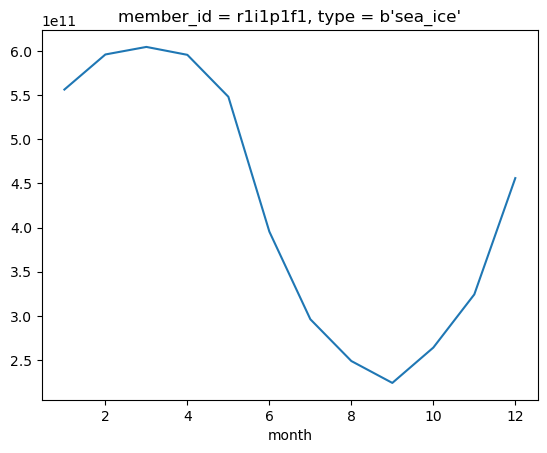

In [43]:
(had_iceExt_monthly).plot()